### Online Casino

In [2]:
# Data management
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  
from datetime import datetime as dt

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [3]:
casino = pd.read_csv('Online_casino_DIB.csv')
casino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138928 entries, 0 to 138927
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ReqTimeUTC         138928 non-null  object 
 1   TransactionType    138928 non-null  object 
 2   TransactionAmount  138928 non-null  float64
 3   Status             138928 non-null  object 
 4   AccountIdentifier  138928 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.3+ MB


In [4]:
casino.dtypes

ReqTimeUTC            object
TransactionType       object
TransactionAmount    float64
Status                object
AccountIdentifier     object
dtype: object

In [5]:
casino['ReqTimeUTC'] = pd.to_datetime(casino['ReqTimeUTC'])

In [6]:
casino.describe(exclude='float64')

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,138928,138928,138928,138928
unique,NaN,3,2,2361
top,NaN,LOYALTYCARDDEBIT,APPROVED,customer10
freq,NaN,70329,133520,2318
mean,2019-08-23 14:37:01.511898112+00:00,NaN,NaN,NaN
min,2019-03-01 08:03:23+00:00,NaN,NaN,NaN
25%,2019-05-19 06:27:26.249999872+00:00,NaN,NaN,NaN
50%,2019-08-21 13:32:02.500000+00:00,NaN,NaN,NaN
75%,2019-11-23 20:28:33.500000+00:00,NaN,NaN,NaN
max,2020-03-02 07:47:06+00:00,NaN,NaN,NaN


In [7]:
casino = casino[casino['ReqTimeUTC'] <= '2020-02-29'].copy()

In [8]:
casino.describe(exclude='float64')

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,137857,137857,137857,137857
unique,NaN,3,2,2351
top,NaN,LOYALTYCARDDEBIT,APPROVED,customer10
freq,NaN,69795,132473,2294
mean,2019-08-22 03:05:44.556649216+00:00,NaN,NaN,NaN
min,2019-03-01 08:03:23+00:00,NaN,NaN,NaN
25%,2019-05-18 13:13:36+00:00,NaN,NaN,NaN
50%,2019-08-20 03:04:39+00:00,NaN,NaN,NaN
75%,2019-11-21 13:40:41+00:00,NaN,NaN,NaN
max,2020-02-28 23:54:14+00:00,NaN,NaN,NaN


In [9]:
casino['TransactionType'].unique()

array(['LOYALTYCARDDEBIT', 'LOYALTYCARDCREDITCL', 'LOYALTYCARDCREDIT'],
      dtype=object)

In [10]:
casino['TransactionType'] = casino['TransactionType'].map({'LOYALTYCARDDEBIT':'L2D', 'LOYALTYCARDCREDITCL':'L1D', 'LOYALTYCARDCREDIT':'L2W'})

In [11]:
casino['TransactionType'].value_counts()

TransactionType
L2D    69795
L1D    64252
L2W     3810
Name: count, dtype: int64

In [12]:
user_type = casino.groupby(['AccountIdentifier', 'TransactionType']).count().reset_index()

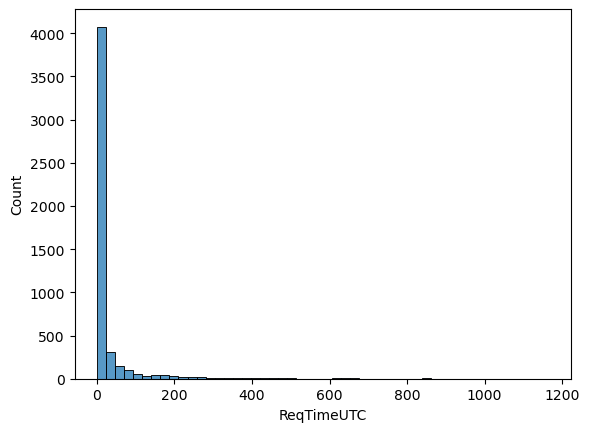

In [13]:
sns.histplot(data = user_type, x='ReqTimeUTC', bins=50)
plt.show()

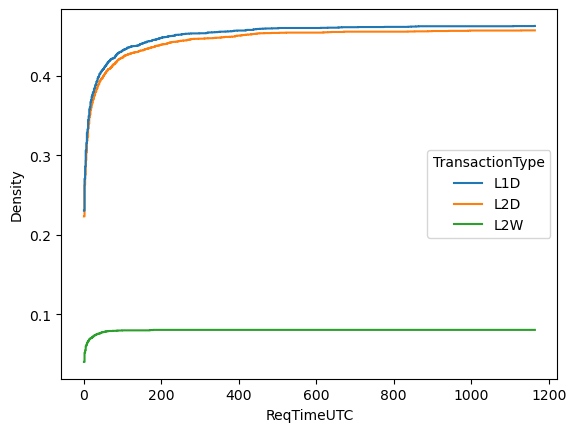

In [14]:
sns.histplot(data = user_type, x='ReqTimeUTC', hue = "TransactionType", cumulative=True, stat="density", element="step", fill=False)
plt.show()

In [15]:
casino['TransactionType'].value_counts()

TransactionType
L2D    69795
L1D    64252
L2W     3810
Name: count, dtype: int64

In [16]:
casino['Status'].value_counts()

Status
APPROVED    132473
DECLINED      5384
Name: count, dtype: int64

In [17]:
casino = casino[(casino['TransactionType'] == 'L2D') & (casino['Status'] == 'APPROVED')]
top20_freq = casino.groupby('AccountIdentifier').count().reset_index().iloc[:,0:2].sort_values(by='ReqTimeUTC')[::-1][0:20]
top20_spenders = casino[['AccountIdentifier', 'TransactionAmount']].groupby('AccountIdentifier').sum().reset_index().sort_values(by='TransactionAmount')[::-1][0:20]
top20_spenders

,AccountIdentifier,TransactionAmount
977,customer189,401531.93
682,customer162,168295.00
1873,customer63,151583.00
1471,customer268,135528.95
1550,customer339,116869.90
605,customer155,100926.00
1463,customer260,93812.58
1961,customer71,85171.16
78,customer107,82539.11
1895,customer65,78983.69


<Axes: xlabel='TransactionAmount', ylabel='AccountIdentifier'>

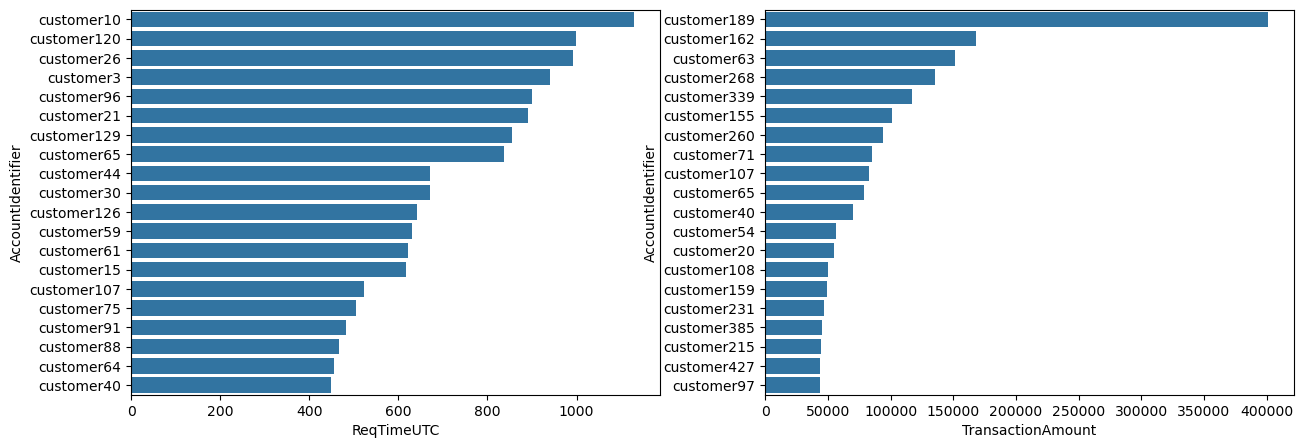

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.barplot(top20_freq, x='ReqTimeUTC', y = 'AccountIdentifier', ax=ax[0])
sns.barplot(top20_spenders, x = 'TransactionAmount', y='AccountIdentifier', ax=ax[1])


In [19]:
casino['hour'] = casino['ReqTimeUTC'].dt.hour
casino['day_of_week'] = casino['ReqTimeUTC'].dt.day_of_week
day_of_week_dictionary = {0:'1_Monday', 1:'2_Tuesday',2:'3_Wednesday', 3:'4_Thursday', 4:'5_Friday', 5:'6_Saturday', 6:'7_Sunday'}
casino['day_of_week'] = casino['day_of_week'].map(day_of_week_dictionary)
casino


,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier,hour,day_of_week
0,2019-07-05 05:02:28+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
1,2019-07-05 05:26:00+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
5,2019-07-05 04:54:37+00:00,L2D,10.0,APPROVED,customer1734,4,5_Friday
6,2020-02-02 06:50:37+00:00,L2D,50.0,APPROVED,customer935,6,7_Sunday
7,2019-12-13 12:29:32+00:00,L2D,100.0,APPROVED,customer935,12,5_Friday
...,...,...,...,...,...,...,...
138916,2020-02-12 10:54:47+00:00,L2D,10.0,APPROVED,customer1576,10,3_Wednesday
138918,2019-08-24 21:32:43+00:00,L2D,10.0,APPROVED,customer1874,21,6_Saturday
138919,2019-11-01 06:51:07+00:00,L2D,30.0,APPROVED,customer1994,6,5_Friday
138926,2019-05-23 20:02:49+00:00,L2D,10.0,APPROVED,customer2215,20,4_Thursday


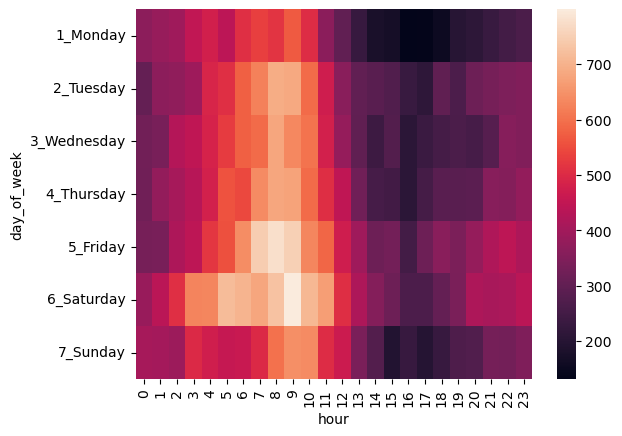

In [20]:
casino_hm = casino.pivot_table(index='day_of_week', values='TransactionType', columns='hour', aggfunc='count')
sns.heatmap(casino_hm)
plt.show()

In [21]:
casino

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier,hour,day_of_week
0,2019-07-05 05:02:28+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
1,2019-07-05 05:26:00+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
5,2019-07-05 04:54:37+00:00,L2D,10.0,APPROVED,customer1734,4,5_Friday
6,2020-02-02 06:50:37+00:00,L2D,50.0,APPROVED,customer935,6,7_Sunday
7,2019-12-13 12:29:32+00:00,L2D,100.0,APPROVED,customer935,12,5_Friday
...,...,...,...,...,...,...,...
138916,2020-02-12 10:54:47+00:00,L2D,10.0,APPROVED,customer1576,10,3_Wednesday
138918,2019-08-24 21:32:43+00:00,L2D,10.0,APPROVED,customer1874,21,6_Saturday
138919,2019-11-01 06:51:07+00:00,L2D,30.0,APPROVED,customer1994,6,5_Friday
138926,2019-05-23 20:02:49+00:00,L2D,10.0,APPROVED,customer2215,20,4_Thursday


In [22]:
casino['date'] = casino['ReqTimeUTC'].dt.floor('D')
daily_activity = casino.groupby(['AccountIdentifier', 'date']).agg({'TransactionAmount': 'sum', 'TransactionType': 'count'}).reset_index()


<Axes: xlabel='date', ylabel='TransactionAmount'>

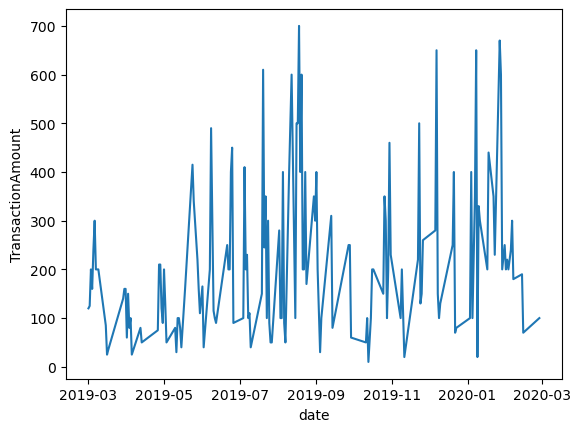

In [23]:
c1 = daily_activity[daily_activity['AccountIdentifier'] == 'customer1']
sns.lineplot(c1, x='date', y='TransactionAmount')

In [24]:
daily_activity[daily_activity['AccountIdentifier'] == 'customer1']

,AccountIdentifier,date,TransactionAmount,TransactionType
0,customer1,2019-03-01 00:00:00+00:00,120.0,3
1,customer1,2019-03-02 00:00:00+00:00,125.0,2
2,customer1,2019-03-03 00:00:00+00:00,200.0,2
3,customer1,2019-03-04 00:00:00+00:00,160.0,3
4,customer1,2019-03-05 00:00:00+00:00,240.0,3
...,...,...,...,...
154,customer1,2020-02-06 00:00:00+00:00,300.0,4
155,customer1,2020-02-07 00:00:00+00:00,180.0,3
156,customer1,2020-02-14 00:00:00+00:00,190.0,5
157,customer1,2020-02-15 00:00:00+00:00,70.0,3


In [25]:
pd.date_range(daily_activity['date'].min(), daily_activity['date'].max())

DatetimeIndex(['2019-03-01 00:00:00+00:00', '2019-03-02 00:00:00+00:00',
               '2019-03-03 00:00:00+00:00', '2019-03-04 00:00:00+00:00',
               '2019-03-05 00:00:00+00:00', '2019-03-06 00:00:00+00:00',
               '2019-03-07 00:00:00+00:00', '2019-03-08 00:00:00+00:00',
               '2019-03-09 00:00:00+00:00', '2019-03-10 00:00:00+00:00',
               ...
               '2020-02-19 00:00:00+00:00', '2020-02-20 00:00:00+00:00',
               '2020-02-21 00:00:00+00:00', '2020-02-22 00:00:00+00:00',
               '2020-02-23 00:00:00+00:00', '2020-02-24 00:00:00+00:00',
               '2020-02-25 00:00:00+00:00', '2020-02-26 00:00:00+00:00',
               '2020-02-27 00:00:00+00:00', '2020-02-28 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=365, freq='D')

In [26]:
customer_id = 'customer2'
customer_df = daily_activity[daily_activity['AccountIdentifier'] == customer_id]
full_range = list(pd.date_range(customer_df['date'].min(), customer_df['date'].max()))
customer_df.set_index('date', inplace=True)
customer_df.reindex(full_range, fill_value=0)
customer_df['AccountIdentifier'] = customer_id
customer_df

,AccountIdentifier,TransactionAmount,TransactionType
date,,,
2019-11-05 00:00:00+00:00,customer2,120.0,6
2019-11-06 00:00:00+00:00,customer2,210.0,13
2019-11-07 00:00:00+00:00,customer2,280.0,14
2019-11-08 00:00:00+00:00,customer2,40.0,3
2019-11-09 00:00:00+00:00,customer2,20.0,1
...,...,...,...
2020-02-21 00:00:00+00:00,customer2,290.0,29
2020-02-22 00:00:00+00:00,customer2,10.0,1
2020-02-23 00:00:00+00:00,customer2,10.0,1


In [37]:
full_customer_df = pd.DataFrame()
for customer_id in daily_activity['AccountIdentifier'].unique():
    customer_df = daily_activity[daily_activity['AccountIdentifier'] == customer_id]
    full_range = pd.date_range(customer_df['date'].min(), customer_df['date'].max())
    customer_df.set_index('date', inplace=True)
    customer_df.reindex(list(full_range), fill_value=0)
    customer_df['AccountIdentifier'] = customer_id
    full_customer_df = pd.concat([full_customer_df, customer_df])
full_customer_df = full_customer_df.reset_index()

In [38]:
full_customer_df

,date,AccountIdentifier,TransactionAmount,TransactionType
0,2019-03-01 00:00:00+00:00,customer1,120.0,3
1,2019-03-02 00:00:00+00:00,customer1,125.0,2
2,2019-03-03 00:00:00+00:00,customer1,200.0,2
3,2019-03-04 00:00:00+00:00,customer1,160.0,3
4,2019-03-05 00:00:00+00:00,customer1,240.0,3
...,...,...,...,...
28600,2019-03-14 00:00:00+00:00,customer996,25.0,1
28601,2019-09-13 00:00:00+00:00,customer996,25.0,2
28602,2019-09-22 00:00:00+00:00,customer997,50.0,1
28603,2019-11-09 00:00:00+00:00,customer998,50.0,2


In [39]:
full_customer_df['period'] = full_customer_df['date'].dt.to_period('M')
customer_byperiod = full_customer_df[['AccountIdentifier', 'period']]
customer_byperiod

/var/folders/ky/1l79mmbn5y724s2qym0y5t_c0000gn/T/ipykernel_72095/2370876189.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_customer_df['period'] = full_customer_df['date'].dt.to_period('M')


,AccountIdentifier,period
0,customer1,2019-03
1,customer1,2019-03
2,customer1,2019-03
3,customer1,2019-03
4,customer1,2019-03
...,...,...
28600,customer996,2019-03
28601,customer996,2019-09
28602,customer997,2019-09
28603,customer998,2019-11


In [40]:
start_end_df = customer_byperiod.groupby('AccountIdentifier')['period'].agg(month_x='min', month_y='max').reset_index()
start_end_df.head()

,AccountIdentifier,month_x,month_y
0,customer1,2019-03,2020-02
1,customer10,2019-03,2020-02
2,customer100,2019-06,2020-02
3,customer1000,2019-05,2019-05
4,customer1001,2019-07,2020-02


In [41]:
source_target_value = start_end_df.groupby(['month_x', 'month_y']).count().reset_index()
source_target_value

,month_x,month_y,AccountIdentifier
0,2019-03,2019-03,276
1,2019-03,2019-04,58
2,2019-03,2019-05,49
3,2019-03,2019-06,33
4,2019-03,2019-07,27
...,...,...,...
73,2019-12,2020-01,17
74,2019-12,2020-02,30
75,2020-01,2020-01,134
76,2020-01,2020-02,38


In [42]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()


In [43]:
le.fit_transform(source_target_value['month_x'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 100,
        thickness = 10,
        line = dict(color = 'gray', width = 0.5),
        label = ["Mar", "Apr", "May", "Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"],
        color = "orange"
    ),
    link = dict(
        source =le.transform(source_target_value.month_x.tolist()),
        target = le.transform(source_target_value.month_y.tolist()),
        value = source_target_value.AccountIdentifier.tolist(),
        hovercolor=["black"],
    ))])
fig.update_layout(title_text="Customer Lifetime: March 2023 - February 2024", font_size=10)
fig.show()

In [49]:
fast_quitters = source_target_value[source_target_value['month_x'] == source_target_value['month_y']]
fast_quitters

,month_x,month_y,AccountIdentifier
0,2019-03,2019-03,276
12,2019-04,2019-04,92
23,2019-05,2019-05,105
33,2019-06,2019-06,82
42,2019-07,2019-07,94
50,2019-08,2019-08,80
57,2019-09,2019-09,70
63,2019-10,2019-10,62
68,2019-11,2019-11,65
72,2019-12,2019-12,87


In [45]:
returning_customers = source_target_value[source_target_value['month_x'] != source_target_value['month_y']]
returning_customers

,month_x,month_y,AccountIdentifier
1,2019-03,2019-04,58
2,2019-03,2019-05,49
3,2019-03,2019-06,33
4,2019-03,2019-07,27
5,2019-03,2019-08,29
...,...,...,...
70,2019-11,2020-01,6
71,2019-11,2020-02,22
73,2019-12,2020-01,17
74,2019-12,2020-02,30


In [50]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 100,
        thickness = 10,
        line = dict(color = 'gray', width = 0.5),
        label = ["Mar", "Apr", "May", "Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"],
        color = "orange"
    ),
    link = dict(
        source =le.transform(returning_customers.month_x.tolist()),
        target = le.transform(returning_customers.month_y.tolist()),
        value = returning_customers.AccountIdentifier.tolist(),
        hovercolor=["black"],
    ))])
fig.update_layout(title_text="Returning Customer Lifetime: March 2023 - February 2024", font_size=10)
fig.show()

In [51]:
tc_df = customer_byperiod.groupby('period').count().reset_index()
tc_df


,period,AccountIdentifier
0,2019-03,3199
1,2019-04,2577
2,2019-05,2513
3,2019-06,2275
4,2019-07,2430
5,2019-08,2394
6,2019-09,2274
7,2019-10,2410
8,2019-11,2232
9,2019-12,2234


In [52]:
fq_df = fast_quitters[['month_x', 'AccountIdentifier']]
fq_df

,month_x,AccountIdentifier
0,2019-03,276
12,2019-04,92
23,2019-05,105
33,2019-06,82
42,2019-07,94
50,2019-08,80
57,2019-09,70
63,2019-10,62
68,2019-11,65
72,2019-12,87


In [53]:
pd.merge(tc_df, fq_df, left_on= 'period', right_on='month_x' )

,period,AccountIdentifier_x,month_x,AccountIdentifier_y
0,2019-03,3199,2019-03,276
1,2019-04,2577,2019-04,92
2,2019-05,2513,2019-05,105
3,2019-06,2275,2019-06,82
4,2019-07,2430,2019-07,94
5,2019-08,2394,2019-08,80
6,2019-09,2274,2019-09,70
7,2019-10,2410,2019-10,62
8,2019-11,2232,2019-11,65
9,2019-12,2234,2019-12,87


In [54]:
churn_df = pd.merge(tc_df, fq_df, left_on= 'period', right_on='month_x' )[['period', 'AccountIdentifier_x', 'AccountIdentifier_y']]
churn_df.rename(columns = {"period": "period","AccountIdentifier_x":"total", "AccountIdentifier_y":"quit"}, inplace=True)
churn_df

,period,total,quit
0,2019-03,3199,276
1,2019-04,2577,92
2,2019-05,2513,105
3,2019-06,2275,82
4,2019-07,2430,94
5,2019-08,2394,80
6,2019-09,2274,70
7,2019-10,2410,62
8,2019-11,2232,65
9,2019-12,2234,87


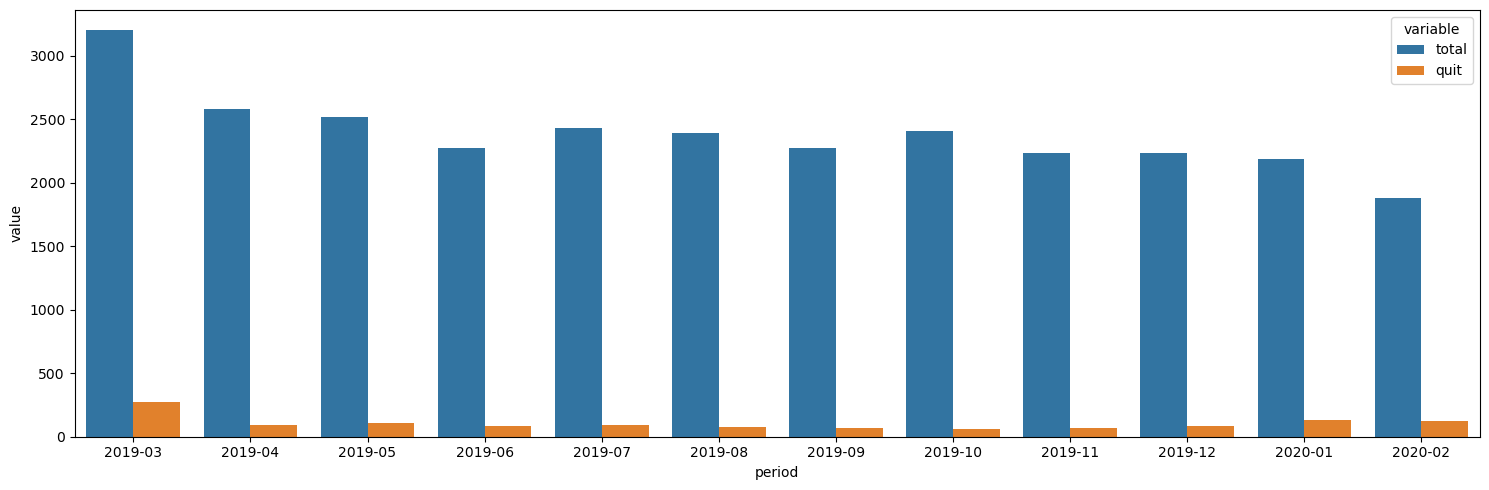

In [55]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(churn_df.melt(id_vars=['period']), x='period', y='value', hue='variable' )
plt.tight_layout()